# Session 5: Final Project – Fantasy Baseball Team Challenge

Welcome to the final session! In this project, you’ll draft a fantasy baseball team using real MLB data. You'll calculate creative statistics to evaluate players, and then you’ll assemble your dream team. 

Let’s go back in time and remember the steroid era in baseball. “The steroids era” refers to the period of Major League Baseball history when the use of performance-enhancing drugs was rampant and had a significant impact on the game. Although there had been isolated incidents of steroid use in baseball before, the era is most closely associated with the mid-1990s through 2007 and had a marked effect on the number of home runs hit.

Your job is to draft players from one of those years on your team not based on the home runs, I know bummer, but using the following four metrics: Calculate custom baseball metrics and create your own three unique metrics or use your favorites:

- **SBED (Stolen Base Effectiveness Differential)**: Highlights the efficiency of a player's attemped stolen bases
- **ATR (Assist-to-Run Ratio)**: Measures unselfish run-creation

Good luck and have fun! 

## **Concepts Covered**
- Accessing real MLB data with the `pybaseball` package
- Calculating custom baseball metrics:
  - **SBED (Stolen Base Effectiveness Differential)**: Highlights the efficiency of a player's attemped stolen bases
  - **ATR (Assist-to-Run Ratio)**: Measures unselfish run-creation
  - Create your own custome statistics or use your favorites
- Making data-driven decisions to build a fantasy team

## Load Data

In [1]:
from pybaseball import batting_stats, fielding_stats, playerid_lookup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load stats for a specific season
year_value = 1998
batting_df = batting_stats(year_value)
fielding_df = fielding_stats(year_value)

In [2]:
batting_df

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,1008559,1998,Mark McGwire,STL,34,155,509,681,152,61,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,8.5
3,1109,1998,Barry Bonds,SFG,33,156,552,697,167,79,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,8.5
4,1093,1998,John Olerud,NYM,29,160,557,665,197,135,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,8.1
30,1274,1998,Alex Rodriguez,SEA,22,161,686,748,213,131,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,7.9
24,190,1998,Nomar Garciaparra,BOS,24,143,604,652,195,115,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1009040,1998,Paul Molitor,MIN,41,126,502,559,141,103,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,-0.8
149,653,1998,Mark Grudzielanek,- - -,28,156,589,641,160,128,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,-0.8
152,1007585,1998,Mark Lewis,PHI,28,142,518,580,129,97,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,-1.1
158,889,1998,Rey Ordonez,NYM,27,153,505,548,124,101,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,-1.5


In [3]:
# David Aardsma
playerid_lookup('Aardsma', 'David', fuzzy=True) 

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,aardsma,david,430911,aardd001,aardsda01,1902,2004.0,2015.0


## 1. Stolen Base Effectiveness Differential 
Highlights the efficiency of a player's attemped stolen bases. Also, ratio is only calculated when a player attemped 20 more stolen bases in that season.

**Formula:**

`Stolen Base Effectiveness Differential = (Stolen Bases - Stolen Bases Attemped) / Total Stolen Bases`

In [4]:
# Calculate Net_SB_Effectiveness only for players with at least 20 SB
batting_df['SBED'] = np.where(
    batting_df['SB'] >= 20,
    (batting_df['SB'] - batting_df['CS']) / (batting_df['SB'] + batting_df['CS']),
    0
)

# Fill any NaN values (just in case) with 0
batting_df['SBED'] = batting_df['SBED'].fillna(0)

# Optional: View top performers
print(batting_df[['Name', 'Team', 'SB', 'CS', 'SBED']].sort_values(by='SBED', ascending=False).head(10))

                 Name Team  SB  CS      SBED
32       Barry Larkin  CIN  26   3  0.793103
146       Tony Womack  PIT  58   8  0.757576
81       Andruw Jones  ATL  27   4  0.741935
29       Craig Biggio  HOU  50   8  0.724138
85       Kenny Lofton  CLE  54  10  0.687500
33      Jason Kendall  PIT  26   5  0.677419
27       Ray Lankford  STL  26   5  0.677419
106  Rickey Henderson  OAK  66  13  0.670886
41        Derek Jeter  NYY  30   6  0.666667
125       Chad Curtis  NYY  21   5  0.615385


## 2. ATR - Assist-to-Run Ratio
Estimates a player's role in setting up scoring via sacrifices.

**Formula:**
`ATR = (Sac Flies + Sac Hits) / Plate Appearances`

In [14]:
batting_df['ATR'] = (batting_df['SF'] + batting_df['SH']) / batting_df['PA']

In [15]:
# Optional: View top performers
print(batting_df[['Name', 'Team', 'SB', 'CS', 'SBED', 'SF', 'SH', 'PA', 'ATR']].sort_values(by='ATR', ascending=False).head(10))

                  Name   Team  SB  CS      SBED  SF  SH   PA       ATR
142        Neifi Perez    COL   5   6  0.000000   4  22  712  0.036517
119       Mike Bordick    BAL   6   7  0.000000   4  15  533  0.035647
158        Rey Ordonez    NYM   3   6  0.000000   4  15  548  0.034672
157      Desi Relaford    PHI   9   5  0.000000   6  10  546  0.029304
117       Omar Vizquel    CLE  37  12  0.510204   6  12  660  0.027273
129      Mark McLemore    TEX  12   4  0.000000   3  12  567  0.026455
156      Alex Gonzalez    TOR  21   6  0.555556   3  13  618  0.025890
52         Ellis Burks  - - -  11   8  0.000000   9   6  582  0.025773
137     Gary DiSarcina    ANA  11   7  0.000000   3  12  595  0.025210
118  Quinton McCracken    TBD  19  10  0.000000   8   9  675  0.025185


## 4. Add Your Own Three

In [6]:
# Metric 1

In [7]:
# Metric 2

In [8]:
# Metric 3

## Example: Compare Top Ten Players
Compare top 10 players on key metrics using a simple bar chart.

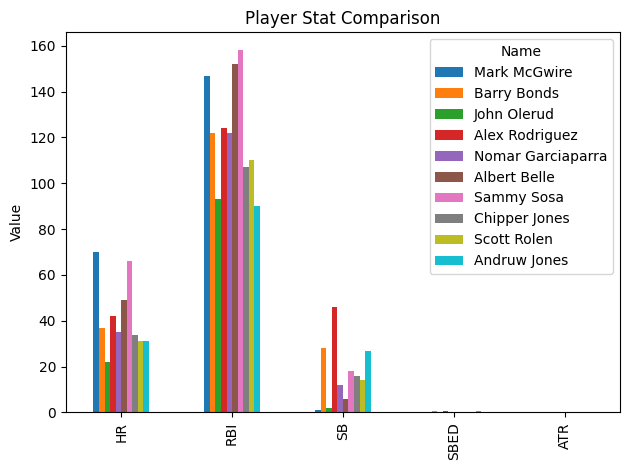

In [11]:
# Choose ten players to compare (edit names as needed)
player_names = batting_df.Name[:10].to_list()
comparison_df = batting_df[batting_df['Name'].isin(player_names)][
    ['Name', 'HR', 'RBI', 'SB', 'SBED', 'ATR']]

comparison_df.set_index('Name').T.plot(
    kind='bar', title='Player Stat Comparison')
plt.ylabel('Value')
plt.tight_layout()
plt.show()